# Welcome

Hello and welcome to Proportunity machine learning challenge.

What follows is a series of questions about machine learning theory intertwined with programming tasks. The first one puts more focus on your Python skills, the second allows us to see how you interact with data and tackle an optmisation problem.

Your results will not be scored against predefined answers. Rather, we are hoping to learn how you approach a problem, what tools you use and how you explain your ideas (through code and words). Use comments where appropriate, but prefer coding in a way that is self-explanatory - your code will be evaluated by someone who is proficient in Python and core ML libraries such as pandas, numpy, sklearn or matplotlib.

Once done, clean up the code, restart the kernel, run all of the cells sequentially, save the result and send us the notebook.

Best of luck!

# Part 1: Hyperparameter optimisation

*(<90 minutes)*

Model evaluation and selection is essential for construction of reliable systems. The usual computation follows this structure:

1. Load data
2. Configure model hyperparameters
3. Train the model (slow process)
4. Evaluate the model on some predefined metrics
5. Repeat the above and pick the best model

An abstract example of this is the `run` function in the code below. The purpose of the function is to find the set of hyperparameters that leads to the highest score.

## Task 1

Complete function`evaluate_all_scores`. It should compute a weighted average of particular scoring functions with weights defined in `score_params` dictionary.

*Comments (if any):*

## Task 2

Write `optimize_model` to find the optimal model (highest score) given the search space. Your algorithm
should try every possible combination of parameters $a$, $b$ and $c$ and find the optimal one.

Would your solution still work if a new parameter $d$ was added to the search space?

Run the code cells below after completing all `#TODO` sections.

*Comments (if any):*

In [ ]:
# Preferably, do not modify code in this cell

class Data:
    """Placeholder class only. Imagine this substituted with a DataFrame or another structure."""
    pass


def evaluate_score1(data: Data, model_hparams: dict):
    d = model_hparams['a'] - model_hparams['b']
    return d**2


def evaluate_score2(data: Data, model_hparams: dict):
    return (model_hparams['a']**2 + model_hparams['b']**2 + model_hparams['c']**2)/3.0


def run():
    data = Data()

    example = {
        'a': 1,
        'b': 2,
        'c': 3
    }
    print('score 1 = ', evaluate_score1(data, example))
    print('score 2 = ', evaluate_score2(data, example))
    

    # TASK 1
    score_params = {
        1: 0.5,  # Weight of evaluate_score1
        2: 0.5   # Weight of evaluate_score2
    }
    print('total_score = ', evaluate_all_scores(data, example, score_params, [evaluate_score1, evaluate_score2]))

    # TASK 2
    search_space = {
        'a': list(range(100)),
        'b': [-1, 0, 1, 10] + list(range(11, 30)),
        'c': [-10, -5, 0, 5, 10],
    }
    
    optimal_model_hparams, optimal_score = optimize_model(data, search_space, score_params, [evaluate_score1, evaluate_score2])
    print('optimal_score = ', optimal_score)
    print('optimal_model_hparams = ', optimal_model_hparams)    
    

In [ ]:
import itertools
#Both functions work for any number of params

def evaluate_all_scores(data: Data, model_hparams: dict, score_params: dict, score_functions: list):
  """ Given score_params return total score. """ 
  weighted_evals = []
  for param, func in zip(score_params.values(), score_functions):
    weighted_evals.append(func(Data, model_hparams) * param)

  return sum(weighted_evals) / len(weighted_evals)



def optimize_model(data: Data, search_space: dict, score_params: dict, score_functions: list):
    """ Explore all settings specified in search_space and return best settings and score """
    
    best_score = 0
    best_hparams = {}

    parameters = search_space.values()
    keys = search_space.keys()
    h_params = {}

    for params in list(itertools.product(*parameters)):
      params_list = list(params)
      h_params = dict(zip(keys, params_list))
      score = evaluate_all_scores(Data, h_params, score_params, score_functions)
      if score > best_score:
        best_score = score
        best_hparams = h_params

    return best_hparams, best_score

In [ ]:
run()

score 1 =  1
score 2 =  4.666666666666667
total_score =  1.4166666666666667
optimal_score =  3325.1666666666665
optimal_model_hparams =  {'a': 99, 'b': -1, 'c': -10}


## Task 3

Answer in text below.


**Question 1- How would I parallelise this algorithm** \\
In short, using pyspark. I would set up a grid search algorithm, either the one above or in a real usecase using a SKlearn pipeline, read in the data using a dask dataframe and parallelise the algorithm aross multiple nodes, say 20, using the dask API.

**Q2: What is the name for the hyperparameter optimisation approach you implemented? Do you know of any alternatives? What are the tradeoffs?** \\
The algorithm I implimented was a simple grid search- it iterates over all of the discrete values defined in the grid, calculates the metrics for each value combination, and finds the value for the best performing instance and what values create this optimal score.  An alternative would be a multi armed bandit algorithm for maximising values, in which instead of iterating over the entire search space, bayesian methods (or conventional methods) are to reach to optimal point in a compelx search space in far fewer iterations by trying distributions with better score distributions more often. Such an algorithm is implimented in ARM's Mango libary, it performs roughly 7000x faster than grid search for optimisation, but due to the bayesian nature there is a slim chance it may accidently disguard possible values that would be **more** optimal

**Q3: What is the danger of optimizing too much? How does one alleviate this danger?** \\
One issue would potentially be that an algorithm that is perfectly optimisated to a dataset becomes overfitted: if over time the data starts to exibit properties of being non stationary (skew or drift), or even if new data with other distributions are inferred upon (such as if your training data isn't representative of all real world cases lacking generality), an over optimised model would perform suddenly far worse than on its training data. This can be alleviated by using cross validation evaluation, model regularisation, early stopping and more training data.

**Q4: With respect to the previous question. Is this also a problem for time series data? (e.g. prices of properties over time) Are there any additional dangers in this domain?** 
Yes, as mentioned above, with time series data there are some additional risks of overfitting (skew, drift) along with some others. In time series data, traditional test train split's can't be used without "temporal leaks", meaning that often time series models are backtested on the same data that they are trained on, which unsuprisingly would lead to overfitting. To avoid this, models are evaluated using nested cross validation, evaluated using information criteria, or by using bayesian methods. 

**Q5: Q5: Name a few machine learning algorithms that are prone to overfitting and a few that are not. What drives the difference between them? Are there differences in how one would cope with overfitting in those models?** \\
Models which have larger numbers of parameters are more prone to overfitting than their counterparts with less. This means that neural networks, say for a classifier, are more prone to overfitting on data than a much more simplistic model such as a SVM. The main cause of this is that overfitting in terms of inferential statistics is when one attempts to estimate too many parameters from a sample that is too small, and thus larger complexity models (or conversly smaller sample sizes) prevent adequately approximating the true model for your response variable.

Some approaches to handling overfitting may vairy- in neural networks for regression for example, to avoid overfitting dropout layers may be used, while in smaller more simplistic models lasso and ridge regression could be more useful for regularisation of models. Ultimately, the complexity of neural networks means that they are best used for cases of large amounts of training data.

**Q6: Give an example of an interesting research paper from recent years. Briefly, describe the domain and the problem. What is the contribution? Would you have an idea on how improve to the method further? Or apply it in a specific setting?**\\
An interesting paper that recently came out in my opinion was a paper done into the time series forcasting of chaotic systems. The general concept was that in the forcasting in long time spans, or for highly stochastic processes, deterministic components become increasingly more difficult to forcast due to the propergation of randomness in the time series. The paper worked on methods of dimentionality redux and denoising of stochasticity of these chaotic systems to improve the accuracy of forcasting tools like LTSM. The paper used PCA for dimentionality redux, and wavelet transforms for denoising. 

 I got in contact with the writer and suggested that they use partial fourier transforms in place of the wavelet transform, as it seemed that temporal gaps created by WT allowed the model to "cheat" as its result were not reproducable, and also using variational autoencoders for dimentionality redux to preserve possible non liniarities in the input processes as PCA forces orthognality of the resultant features in the reduced vector space. An interesting case of chaotic data for this could be order book data for cryptocurrency.

# Part 2: Predicting property price

## Intro

In this challenge we ask you to explore a dataset, build a price predictive model and argue how further accuracy gain can be enabled.

This is significantly more free-form than the previous set of tasks, so we will let the code do most the talking. We offer some helper questions, but primarily proceed as you would with the goal building an accurate model that joins some ensemble. Provide explanations and key findings through text and plots. 

In case you are short on time: We prefer a simpler but complete pipeline, in contrast to sophisticated preprocessing and modelling but lacking evaluation. Ideally, start with a simple pipeline and add more complexity in subsequent iterations (e.g. don't worry about overfitting on first iteration).

## Tools

Feel free to use whatever Python libraries suit you best. We suggest you install pandas (for loading the data)   and plotly (for displaying variables on the map) - two functions you may find helpful are defined below.

In [ ]:
import pandas as pd
import plotly.express as px


def get_data(path: str):
    """ Loads a specified .csv into a DataFrame. """
    trans = pd.read_csv(
        path,
        #index_col="transaction_id",
        parse_dates=["transfer_date", "previous_transfer_date"],
    )
    return trans


def plot_df_map(df, col=None):
    """ Display selected column from a dataframe on a map. Requires plotly. 
    
    >>> plot_df_map(trans, "price")
    
    """
    assert len(df) < 100000
    
    fig = px.scatter_mapbox(
        data_frame=df,
        lat="latitude", lon="longitude",
        color=col,
        opacity=0.99,
    )

    fig.update_layout(mapbox_style="carto-positron",
                      mapbox_zoom=10, mapbox_center={"lat": df["latitude"].mean(), "lon": df["longitude"].mean()})
    fig.update_layout(margin={"r": 20, "t": 0, "l": 0, "b": 0})
    fig.update_layout(legend_orientation="h")
    return fig

## Data

The training dataset contains information about retail property transactions in a particular London location in years 2005 to 2015. The test dataset contains the same columns except for the price, all the transactions there are from 2015 to 2016. Proportunity builds price models in order to understand which neighbourhoods or property types are likely to be a good investment. The following variables are available:

| **Variable**              | **Description**                                                     	|
|------------------------	|-----------------------------------------------------------------	|
| price                  	| price in GBP at which property was sold                         	|
| transaction_date         	| date of the transaction                                         	|
| property_type          	| building type (D)etached, (F)lat, (S)emi-detached or (T)erraced 	|
| is_new_property         	| describes whether the property was new at the purchase time     	|
| floor_area            	| floor area in metres squared (contains noise and NaNs)          	|
| floor_number            	| floor at which the property is located                          	|
| rooms_count           	| number of rooms                                                 	|
| construction_year_band  	| when was the building constructed (discrete bands)              	|
| latitude               	| latitude in degrees                                             	|
| longitude              	| longitude in degrees                                            	|
| previous_price         	| price in GBP at which property was sold previously              	|
| previous_transaction_date	| date of the previous transaction                                	|

Data may contain outliers and erroneous entries. We ask you to predict price based on the remaining variables. Feel free to transform them or generate new features.

**Question 1:** Which variables are most informative about the price? Make a guess ahead of exploration. Then provide a measure of informativeness and ranking of variables while building the model (may be heuristic). If you could use only $k$ variables, which would you use? Do some of the variables convey similar information?

*point to relevant code cells*

*Comments (if any):* 


## Evaluation

At Proportunity we train models on past data but make predictions about property prices today and in the future. Build your training and evalation with this in mind. You can choose a performance metric for your system - do justify your choice. It is absolutely acceptable for your model to not be able to make a prediction for every property. If that is the case, report also the hitrate of your model (and output a NaN).

**Question 2:** What performance metric did you pick and why? Does your model exhibit bias? Is it particularly good or bad on some sub-populations of the dataset? 

*point to relevant code cells*

*Comments (if any):* 

## Results

Make predictions for the properties in the test file. Return only your prediction column, indexed by `transaction_id`. Send it to us along with the notebook.

**Question 3:** What performance do you expect on transactions from 2015-2016?

*Comments (if any):* 

**Question 1** \\
 I would imagine that the most informative variable would be the floor area for the housing. The measure I plan on using to measure the informativeness is the importance of the models to a tree algorithm for its regression- ultimately the most important features will be those with the highest contribution to predictions of pricing. This will allow for ranking of variables based on contribution, allowing for the use of the kth top. Additionally, I did a pairwise correlation of the numeric variables, but since this was done pre encoding and to avoid the curse of dimentionality, this was only used to rank the numeric variables.

**Question 2**\\
Since this amounts to a regression problem, I chose to use RMSE to evaluate the performance of the model as it measured the 'loss' from the predicted regression line. I also provided the variance for the regression of the neural network to get an idea for how far away most points are from the predicted regression line \\

The model does seem to exibit bias towards numeric features, the XGboost ranking seems to almost completely ignore the contributions of the categorical data. I believe that it performs far worse on houses are higher in price as the data is not evenly distributed by price, meaning that due to the lower number of data points in the high price range, the model overfits in that reigeme, causing far larger error.

**Question 3** \\ 
Since I split the training data into a subsection of test and train data so that I could generate metrics, I can say that the test data is likely to have the same scores as the training data shown later on, assuming no bias was added in the splitting of the data. 



In [ ]:
# load the data
train = get_data("/content/ml-challenge-train.csv")
test  = get_data("/content/ml-challenge-test.csv")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import xgboost as xg
from xgboost import plot_importance

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import mean_squared_error as MSE, explained_variance_score

In [ ]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['price'], axis=1), train['price'], test_size=0.20, random_state=1, shuffle=True)

In [ ]:
#Find the number of null values by column
print(X_train.isnull().sum(), X_test.isnull().sum())

transaction_id                0
transfer_date                 0
property_type_lr              0
new_property                  0
total_floor_area             13
floor_level                5349
number_habitable_rooms    11399
construction_age_band      5705
latitude                      0
longitude                     0
previous_price            17709
previous_transfer_date    17709
dtype: int64 transaction_id               0
transfer_date                0
property_type_lr             0
new_property                 0
total_floor_area             4
floor_level               1318
number_habitable_rooms    2798
construction_age_band     1425
latitude                     0
longitude                    0
previous_price            4451
previous_transfer_date    4451
dtype: int64


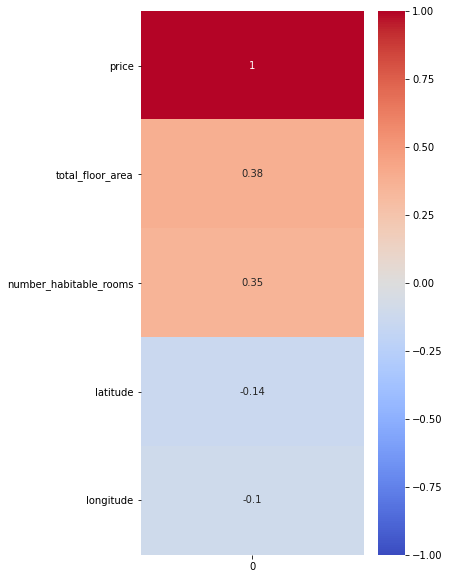

In [ ]:
def pairwise_function(important_var):
  train.dropna()
  correlations = train.corrwith(train[important_var]).iloc[:-1].to_frame()
  correlations['absolute'] = correlations[0].abs()
  sorted_correlations = correlations.sort_values('absolute', ascending=False)[0]
  fig, ax = plt.subplots(figsize=(5,10))
  return sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

#Find correlations to price 
pairwise_function("price")

In [ ]:
#Get idea of distributions of numerical variables
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,44341.0,323977.676620,180020.199253,36250.000000,224995.000000,283000.000000,377000.000000,4.000000e+06
total_floor_area,44324.0,60.381694,38.470871,0.000000,44.000000,61.600000,79.870000,1.409000e+03
number_habitable_rooms,30144.0,3.303178,1.315608,1.000000,2.000000,3.000000,4.000000,3.100000e+01
latitude,44341.0,51.500147,0.013811,51.475003,51.487817,51.500053,51.511626,5.152500e+01
longitude,44341.0,-0.010702,0.025684,-0.049997,-0.029705,-0.017342,0.011200,4.999600e-02
previous_price,22181.0,232677.856499,148082.615856,10.000000,142500.000000,212000.000000,285666.000000,2.950000e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



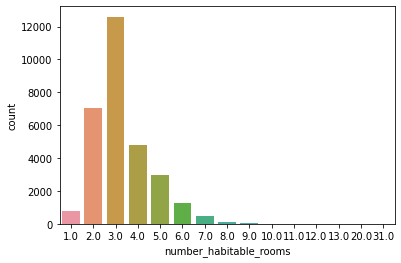

In [ ]:
sns.countplot(train['number_habitable_rooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



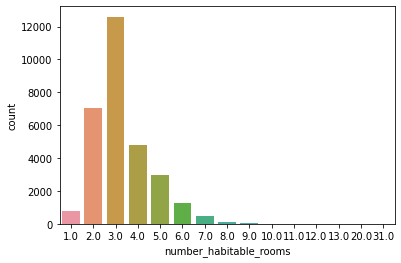

In [ ]:
sns.countplot(train['number_habitable_rooms'])

#Outlier removal for num habitable rooms 
indexNames = train[ train['number_habitable_rooms'] >8 ].index
train.drop(indexNames , inplace=True)

indexNames_test = test[ test['number_habitable_rooms'] >8 ].index
test.drop(indexNames_test , inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



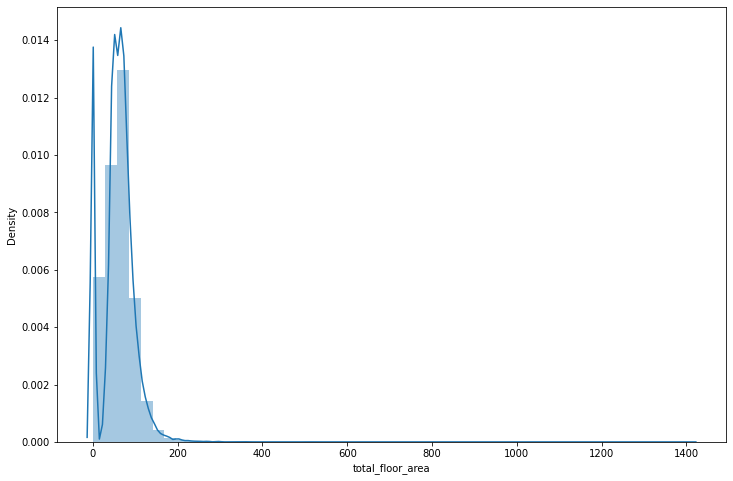

In [ ]:
plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='total_floor_area',data=train)

sns.distplot(train['total_floor_area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



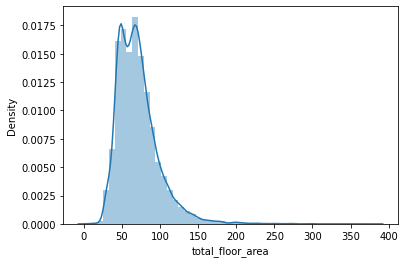

In [ ]:
#Outlier removal for floor_area, houses must have floor area so these are incorrect 

#Drop zero vals
train =train[train['total_floor_area'] !=0]
test =test[test['total_floor_area'] !=0]


indexNames_floor_large = train[ train['total_floor_area'] >400 ].index
train.drop(indexNames_floor_large , inplace=True)


#Remove outliers larger than 400 
indexNames_floor_test = test[ test['total_floor_area'] >400 ].index
test.drop(indexNames_floor_test , inplace=True)

sns.distplot(train['total_floor_area'])

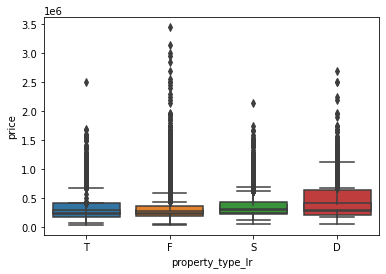

In [ ]:
sns.boxplot(x= 'number_habitable_rooms',y='price',data=train)

sns.boxplot(x= 'property_type_lr',y='price',data=train)


In [ ]:
train.dtypes.value_counts()

object            5
float64           5
datetime64[ns]    2
int64             1
dtype: int64

In [ ]:
train.head(1)

datetime_bin_vals = train[['transfer_date', 'previous_transfer_date']]
datetime_bin_vals.shape, train['price'].shape

((37255, 2), (37255,))

In [ ]:
index_train = X_train['transaction_id']
index_test = X_test['transaction_id']

In [ ]:
def preprocess_numeric(input):
  '''
  Takes in a dataframe, and performs all of the preprocessing to feed into model. Made for reusability on 
  test data which is pre-split

  params- input: pandas dataframe
          output: pandas dataframe of X data

  Could not for the life of me perform a join of the onehot encoded features to the numeric so I just used the numeric features in the end.
  '''

  #Fill the missing data for the data
  input['total_floor_area']= input['total_floor_area'].fillna(value = input['total_floor_area'].mean())
  input['number_habitable_rooms'] = input['number_habitable_rooms'].fillna(value = input['number_habitable_rooms'].mean())
  input['floor_level'] = input['floor_level'].fillna(0)
  input['construction_age_band'] = input['construction_age_band'].fillna(0)
  input['previous_price'] = input['previous_price'].fillna(value = input['previous_price'].mean())


  #Define the numerical variables from the dataframe to be scaled
  numerical_vars = input[['total_floor_area', 'number_habitable_rooms', 'previous_price']]
  scaled = MinMaxScaler().fit_transform(numerical_vars)
  scaled = pd.DataFrame(scaled, columns= [['total_floor_area', 'number_habitable_rooms', 'previous_price']], index = input['transaction_id'])
  
  #Perform the needed label encoding for input columns of only two types 
  new_property = LabelEncoder().fit_transform(input['new_property'])
  new_property = pd.DataFrame(new_property, columns= [['new_property']], index= input['transaction_id'])


  #Define the variables for one hot encoding 
  onehot_vars = input[['property_type_lr', 'floor_level', 'construction_age_band']] 

  #Fill the missing values for the categorical values
  input['floor_level'].fillna("missing")
  input['construction_age_band'].fillna("missing")

  #Onehot encoding of categorical vars and dropping duplicates
  onehot = pd.get_dummies(onehot_vars, drop_first=True, )
  onehot = onehot.loc[:,~onehot.columns.duplicated()]
  onehot.index = input['transaction_id']


  #Output the feature df
  df = pd.concat([new_property, scaled], axis=1)

  return df

In [ ]:
  def preprocess_categorical(input):
    '''takes in a dataframe of categorical variables and outputs their onehot encoded df'''
    
    #Define the variables for one hot encoding 
    onehot_vars = input[['property_type_lr', 'floor_level', 'construction_age_band']] 

    #Fill the missing values for the categorical values
    input['floor_level'].fillna("missing")
    input['construction_age_band'].fillna("missing")

    #Onehot encoding of categorical vars and dropping duplicates
    onehot = pd.get_dummies(onehot_vars, drop_first=True, )
    onehot = onehot.loc[:,~onehot.columns.duplicated()]
    onehot.index = input['transaction_id']
    return onehot

In [ ]:
#create the feature dataframes 
X_train = pd.concat([preprocess_numeric(X_train), preprocess_categorical(X_train)], axis = 1)
X_test =  pd.concat([preprocess_numeric(X_test), preprocess_categorical(X_test)], axis = 1)

In [ ]:
#Algorithm for finding the best hyperparams to use for the XGboost algorithm, commented out because takes way too long to run 

'''
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xg.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
'''

"\nparameters_for_testing = {\n    'colsample_bytree':[0.4,0.6,0.8],\n    'gamma':[0,0.03,0.1,0.3],\n    'min_child_weight':[1.5,6,10],\n    'learning_rate':[0.1,0.07],\n    'max_depth':[3,5],\n    'n_estimators':[10000],\n    'reg_alpha':[1e-5, 1e-2,  0.75],\n    'reg_lambda':[1e-5, 1e-2, 0.45],\n    'subsample':[0.6,0.95]  \n}\n\n                    \nxgb_model = xg.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,\n     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)\n\ngsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')\ngsearch1.fit(X_train,y_train)\nprint (gsearch1.grid_scores_)\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)\n"

Models 

In [ ]:
#Set up an XGboost model to get a hirarchy of features used, numeric and categorical 
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 5, seed = 123, learning_rate = 0.1, booster= "dart", scale_pos_weight=0.375)

xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)

#Print the root mean squared error for the XGboost model
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))


[10:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  194702.631370


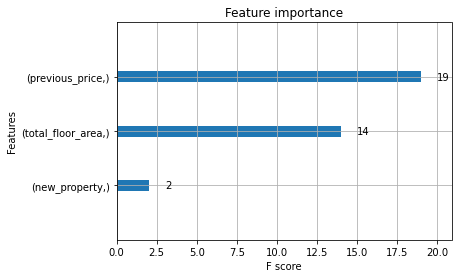

<Figure size 1280x144000 with 0 Axes>

In [ ]:
#Find the most important features  

plot_importance(xgb_r, max_num_features= 5)
plt.figure(figsize=(16, 1800), dpi=80)
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#Define the model
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

earlystop_callback = EarlyStopping(
  monitor='loss',
  patience=2)

In [ ]:
NN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2, callbacks= earlystop_callback, workers = 10)

Epoch 1/10
887/887 [==============================] - 3s 3ms/step - loss: 193529.6997 - mean_absolute_error: 193529.6997 - val_loss: 95548.0312 - val_mean_absolute_error: 95548.0312
Epoch 2/10
887/887 [==============================] - 2s 2ms/step - loss: 95808.4815 - mean_absolute_error: 95808.4815 - val_loss: 88581.5625 - val_mean_absolute_error: 88581.5625
Epoch 3/10
887/887 [==============================] - 2s 2ms/step - loss: 88645.2708 - mean_absolute_error: 88645.2708 - val_loss: 80207.1797 - val_mean_absolute_error: 80207.1797
Epoch 4/10
887/887 [==============================] - 2s 2ms/step - loss: 80270.0371 - mean_absolute_error: 80270.0371 - val_loss: 74313.0156 - val_mean_absolute_error: 74313.0156
Epoch 5/10
887/887 [==============================] - 2s 2ms/step - loss: 76362.0390 - mean_absolute_error: 76362.0390 - val_loss: 73700.7500 - val_mean_absolute_error: 73700.7500
Epoch 6/10
887/887 [==============================] - 2s 2ms/step - loss: 75859.6308 - mean_absolu

In [ ]:
model = NN_model

MAE: 300185.1456001945
MSE: 136430726177.62958
RMSE: 369365.3018051771
VarScore: -0.8949274261334601


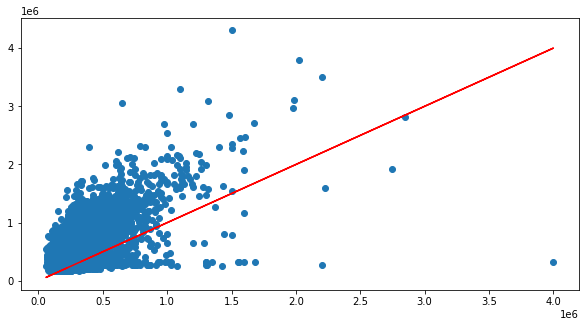

In [ ]:
y_pred = model.predict(X_test)

#Printing performance metrics 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



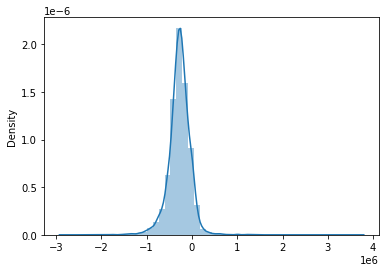

In [ ]:
#Plot distribution of errors
predictions = model.predict(X_test)
errors = y_test.values.reshape(8869, 1) - predictions
sns.distplot(errors)

**Predict on the new data** 

In [ ]:
new_x_data = pd.concat([preprocess_numeric(test), preprocess_categorical(test)], axis = 1)
#Predict on the new data
y_pred_live = model.predict(new_x_data)

#Create dataframe of predictions 
final = pd.DataFrame(y_pred_live, columns= [['price']], index= test['transaction_id'])
final

,price
transaction_id,
{1C649D8A-9AF8-436D-913D-774771F060B7},6.490240e+05
{25EA59FA-1CA3-4D50-E050-A8C0630562D0},5.947379e+05
{2FD36066-1996-4BF8-E050-A8C0620562B1},8.195008e+05
{4DEE9D4C-FC4C-465F-B4ED-AA4986272539},8.232090e+05
{D55AEC5F-B3B5-40F8-A69C-CE7FA28250EA},1.665503e+06
...,...
{5B0E2E9F-57CB-411D-9676-6F9519F7EBAE},1.668346e+06
{545853A0-C6FE-4A21-AB19-4B6A8222F6B0},8.413494e+05
{241A4A53-CFA6-706B-E050-A8C06205638B},2.140578e+05


## Further work

This is a very time-constrained setting and we know how much time model development takes. Having a better idea of challenges in our domain, how would you tackle this problem given more time, more data rows (all of UK) and more columns (additional datasets).

**Question 4:** How would you proceed given another 6 weeks? *(helper questions: What model classes would you expect to perform well? What other data would you consider? Would you break the challenge into multiple simpler problems? If so, how?)*

**Question 4** \\
Given some more time, I would love to explore further the EDA stage of the ML lifecycle. Additionally I would look at using the plotly function to figure out specific zones of the data which have high corrlelations to specific prices, and bin the long and latititude data into zones to feed into the model. 

Additionally, I would love to play around with the optimisation of both my XGboost and neural network algrithms as I am not convinced that they are as accurate as they could potentially be. \\

I would also like to look into normalising the prices were previously saved at by using some extra data of house prices over time, and therefore use that to generate a figure for the normalised value of the house at the last sale which I think could prove a very useful metric. \\

I already broke the problem into the stages of EDA, feature engineering, model training and optimisation before inferance. I think this as a general lifecycle works well, but more emphisis to some areas would have proved useful in a longer time frame. 